Exploring the relationship between model complexity and generalization performance, by adjusting key parameters of various supervised learning models. Part 1 of this assignment will look at regression and Part 2 will look at classification.

## Part 1 - Regression

<IPython.core.display.Javascript object>


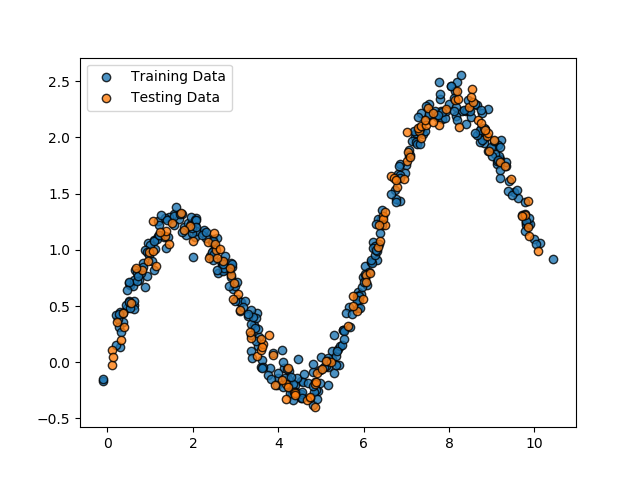

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

np.random.seed(0)
n = 500
x = np.linspace(0, 10, n) + np.random.randn(n)/5
y = np.sin(x) + x/6 + np.random.randn(n)/10

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

def scatter():
    plt.figure()
    plt.scatter(X_train, y_train, label = 'Training Data',edgecolor = 'black', alpha = '0.8')
    plt.scatter(X_test, y_test, label = 'Testing Data',edgecolor = 'black', alpha = '0.8')
    plt.legend()
    
scatter()

### Objctive 1

Write a function that fits a polynomial LinearRegression model on the *training data* `X_train` for degrees 1, 3, 6, and 9. (Use PolynomialFeatures in sklearn.preprocessing to create the polynomial features and then fit a linear regression model) For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. `np.linspace(0,10,100)`) and store this in a numpy array. The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 3, the third row degree 6, and the fourth row degree 9.

<br>
*This function should return a numpy array with shape `(4, 100)`*

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
    
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X_train.reshape(375,1))
X_poly.shape

(375, 3)

In [3]:
np.linspace(0,10,100).shape

(100,)

In [4]:
poly.fit_transform(np.linspace(0,10,100).reshape(100,1)).shape

(100, 3)

In [5]:
def PolyLinearReg():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    result = np.zeros((4, 100))
    for i, degree in enumerate([1, 3, 6, 9]):
        poly = PolynomialFeatures(degree = degree)
        X_poly = poly.fit_transform(X_train.reshape(375,1))
        linreg = LinearRegression().fit(X_poly, y_train)
        y = linreg.predict(poly.fit_transform(np.linspace(0,10,100).reshape(100,1)))
        result[i, :] = y
    return result

PolyLinearReg()

array([[ 0.26403082,  0.27893589,  0.29384095,  0.30874602,  0.32365109,
         0.33855615,  0.35346122,  0.36836629,  0.38327135,  0.39817642,
         0.41308149,  0.42798655,  0.44289162,  0.45779669,  0.47270175,
         0.48760682,  0.50251189,  0.51741695,  0.53232202,  0.54722709,
         0.56213215,  0.57703722,  0.59194229,  0.60684735,  0.62175242,
         0.63665749,  0.65156255,  0.66646762,  0.68137269,  0.69627776,
         0.71118282,  0.72608789,  0.74099296,  0.75589802,  0.77080309,
         0.78570816,  0.80061322,  0.81551829,  0.83042336,  0.84532842,
         0.86023349,  0.87513856,  0.89004362,  0.90494869,  0.91985376,
         0.93475882,  0.94966389,  0.96456896,  0.97947402,  0.99437909,
         1.00928416,  1.02418922,  1.03909429,  1.05399936,  1.06890442,
         1.08380949,  1.09871456,  1.11361962,  1.12852469,  1.14342976,
         1.15833483,  1.17323989,  1.18814496,  1.20305003,  1.21795509,
         1.23286016,  1.24776523,  1.26267029,  1.2

<IPython.core.display.Javascript object>


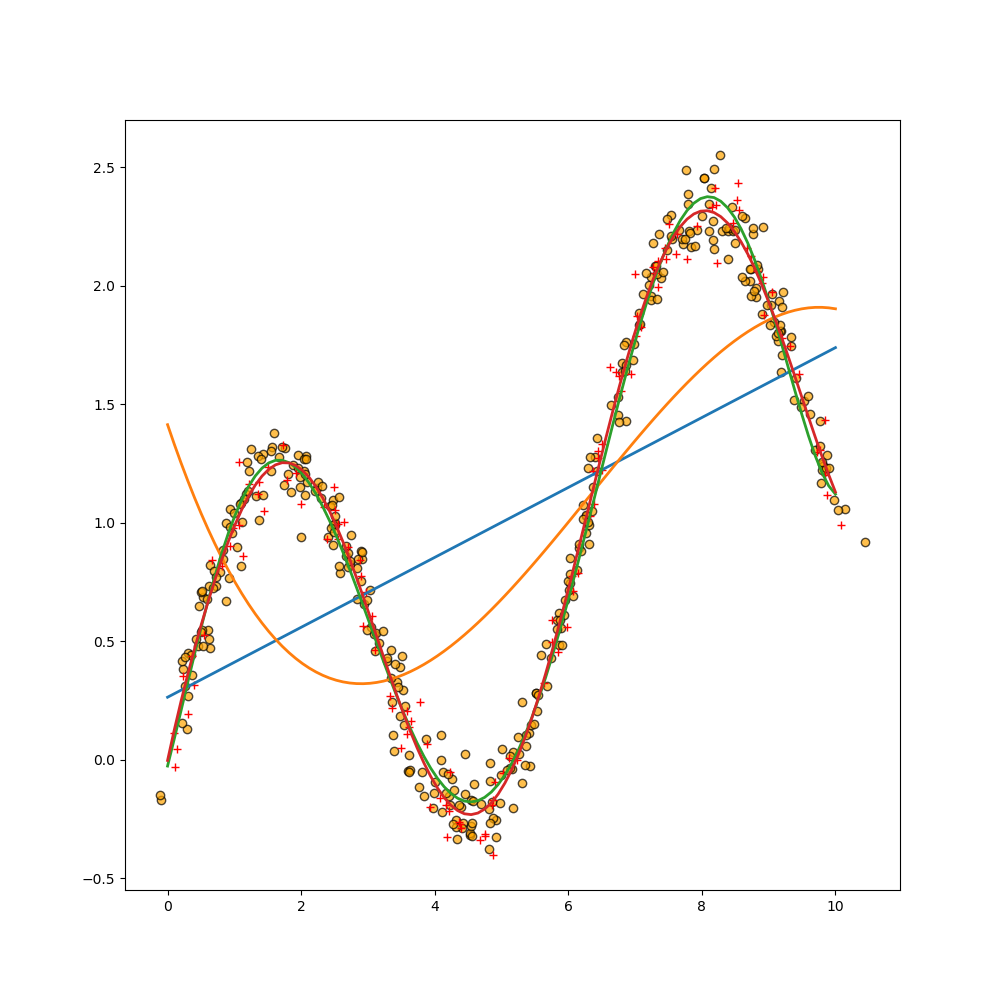

In [6]:
def plot_PolyLinearReg(degree_predictions):
    plt.figure(figsize = (10,10))
    plt.plot(X_train, y_train, 'o', label = 'Training Data',c = 'orange',markeredgecolor = 'black',alpha = 0.7)
    plt.plot(X_test, y_test, '+', label = 'Testing Data', c= 'r')
    for i, degree in enumerate([1, 3 ,6, 9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], lw = 2, label= 'Degree {}'.format(degree))
        
plot_PolyLinearReg(PolyLinearReg())

### Objective 2

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the test data, and return both of these arrays in a tuple.

*This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [7]:
def R2_RegressionScore():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics.regression import r2_score
    
    degrees = np.arange(0,10)
    r2_train = np.zeros([len(degrees)])
    r2_test = np.zeros([len(degrees)])
    
    X_tr = X_train.reshape(-1, 1)
    X_tst = X_test.reshape(-1, 1)
    
    for i, deg in enumerate(degrees):
        poly = PolynomialFeatures(degree = deg)
        X_tr_ = poly.fit_transform(X_tr)
        X_tst_ = poly.transform(X_tst)
        reg = LinearRegression()
        reg.fit(X_tr_,y_train)
        
        r2_train[i] = r2_score(y_train, reg.predict(X_tr_))
        r2_test[i] = r2_score(y_test, reg.predict(X_tst_))
    
    return r2_train, r2_test
        
R2_RegressionScore()

(array([0.        , 0.29364595, 0.42731652, 0.48516964, 0.90385215,
        0.93259722, 0.98187534, 0.98370259, 0.9849994 , 0.98515507]),
 array([-2.72396110e-04,  3.38082864e-01,  4.34017223e-01,  5.02291038e-01,
         9.18662752e-01,  9.42522118e-01,  9.82765316e-01,  9.84405211e-01,
         9.85543976e-01,  9.85902771e-01]))

### Objective 3

Based on the $R^2$ scores from question 2 (degree levels 0 through 9), what degree level corresponds to a model that is underfitting? What degree level corresponds to a model that is overfitting? What choice of degree level would provide a model with good generalization performance on this dataset? 

Hint: Try plotting the $R^2$ scores from question 2 to visualize the relationship between degree level and $R^2$. Remember to comment out the import matplotlib line before submission.

*This function should return one tuple with the degree values in this order: `(Underfitting, Overfitting, Good_Generalization)`. There might be multiple correct solutions, however, you only need to return one possible solution, for example, (1,2,3).* 

In [8]:
def degree_generalization():
    
    r2_train, r2_test = R2_RegressionScore()
    #Sort th score
    r2_train_sorted = np.sort(r2_train)
    r2_test_sorted = np.sort(r2_test)
    
    Underfitting = 0
    Overfitting = 0
    Good_Generalization = 0
    min_r2_train = np.min(r2_train)
    max_r2_train = np.max(r2_train)
    min_r2_test = np.min(r2_test)
    max_r2_test = np.min(r2_test)
    
    for deg, data in enumerate(zip(r2_train, r2_test)):
        if data[0]<r2_train_sorted[5] and data[1]<r2_test_sorted[5]:
            Underfitting = deg
        if data[0]>=r2_train_sorted[5] and data[1]<r2_test_sorted[5]:
            Overfitting = deg
        if data[0]>=r2_train_sorted[5] and data[1]>=r2_test_sorted[7]:
            Good_Generalization = deg
    
    return Underfitting, Overfitting, Good_Generalization

degree_generalization()

(4, 0, 9)

In [9]:
#r2_train, r2_test = R2_RegressionScore()
#a = list(enumerate(zip(r2_train, r2_test)))
#a

#### Plotting

<IPython.core.display.Javascript object>


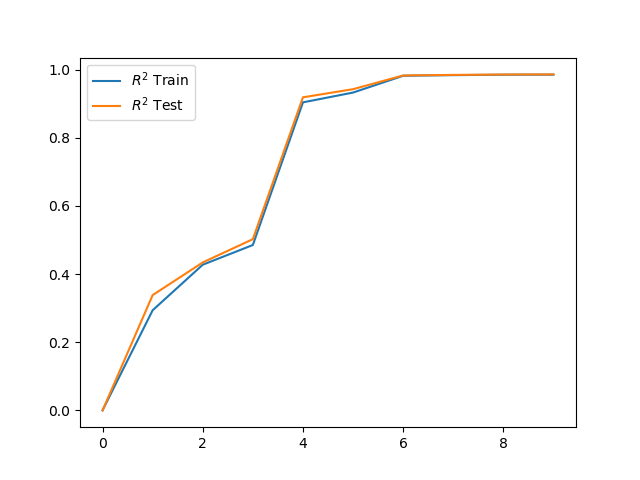

In [10]:
plt.figure()
plt.plot(R2_RegressionScore()[0], label = '$R^2$ Train')
plt.plot(R2_RegressionScore()[1], label = '$R^2$ Test')
plt.legend()

### Objective 4

For this question, train two models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of degree 12. Return the $R^2$ score for both the LinearRegression and Lasso model's test sets.

*This function should return one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score)`*

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics.regression import r2_score

def LassoRegression_model():
    
    alpha = 0.01
    max_itr = 100000
    degree = 12
    
    X_tr = X_train.reshape(-1, 1)
    X_tst =  X_test.reshape(-1, 1)
    poly = PolynomialFeatures(degree = degree)
    X_tr_ = poly.fit_transform(X_tr)
    X_tst_ = poly.transform(X_tst)
    
    lin = LinearRegression()
    lin.fit(X_tr_, y_train)
    LinReg_R2_test_score = r2_score(y_test, lin.predict(X_tst_))
    
    linlasso = Lasso(alpha = alpha, max_iter = max_itr).fit(X_tr_, y_train)
    LinLasso_R2_test_score = r2_score(y_test, linlasso.predict(X_tst_))
    
    return LinReg_R2_test_score, LinLasso_R2_test_score

LassoRegression_model()

c:\users\victor\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(0.985814056712038, 0.9582947615542349)

## Part 2 - Classification

Here's an application of machine learning that could save your life! For this section of the assignment we will be working with the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `mushrooms.csv`. The data will be used to train a model to predict whether or not a mushroom is poisonous. The following attributes are provided:

*Attribute Information:*

1. cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s 
2. cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s 
3. cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
4. bruises?: bruises=t, no=f 
5. odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
6. gill-attachment: attached=a, descending=d, free=f, notched=n 
7. gill-spacing: close=c, crowded=w, distant=d 
8. gill-size: broad=b, narrow=n 
9. gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
10. stalk-shape: enlarging=e, tapering=t 
11. stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
12. stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s 
13. stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s 
14. stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
15. stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
16. veil-type: partial=p, universal=u 
17. veil-color: brown=n, orange=o, white=w, yellow=y 
18. ring-number: none=n, one=o, two=t 
19. ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
20. spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
21. population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
22. habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

<br>

Use pd.get_dummies to convert the categorical variables into indicator variables. 

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

mush_df = pd.read_csv("mushrooms.csv")
mush_df2 = pd.get_dummies(mush_df)

X_mush = mush_df2.iloc[:,2:]
y_mush = mush_df2.iloc[:,1]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mush, y_mush, random_state = 0 )

X_subset = X_test2
y_subset = y_test2

### Objective 5
Using X_train2 and y_train2 from the preceeding cell, train a DecisionTreeClassifier with default parameters and random_state=0. What are the 5 most important features found by the decision tree?

As a reminder, the feature names are available in the X_train2.columns property, and the order of the features in X_train2.columns matches the order of the feature importance values in the classifier's feature_importances_ property.

In [19]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state = 0 ).fit(X_train2, y_train2)
imp = clf.feature_importances_
X_train2.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

In [20]:
def importantFeatures():
    from sklearn.tree import DecisionTreeClassifier
    
    clf = DecisionTreeClassifier(random_state = 0).fit(X_train2, y_train2)
    features = []
    for feature, importance in zip(X_train2.columns, clf.feature_importances_):
        features.append((importance, feature))        
    features.sort(reverse=True)
    return [feature[1] for feature in features[:5]]

importantFeatures()

['odor_n', 'stalk-root_c', 'stalk-root_r', 'spore-print-color_r', 'odor_l']

### Objective 5

For this question, we're going to use the validation_curve function in sklearn.model_selection to determine training and test scores for a Support Vector Classifier (SVC) with varying parameter values. Recall that the validation_curve function, in addition to taking an initialized unfitted classifier object, takes a dataset as input and does its own internal train-test splits to compute results.

Because creating a validation curve requires fitting multiple models, for performance reasons this question will use just a subset of the original mushroom dataset: please use the variables X_subset and y_subset as input to the validation curve function (instead of X_mush and y_mush) to reduce computation time.

The initialized unfitted classifier object we'll be using is a Support Vector Classifier with radial basis kernel. So your first step is to create an SVC object with default parameters (i.e. kernel='rbf', C=1) and random_state=0. Recall that the kernel width of the RBF kernel is controlled using the gamma parameter.

With this classifier, and the dataset in X_subset, y_subset, explore the effect of gamma on classifier accuracy by using the validation_curve function to find the training and test scores for 6 values of gamma from 0.0001 to 10 (i.e. np.logspace(-4,1,6)). Recall that you can specify what scoring metric you want validation_curve to use by setting the "scoring" parameter. In this case, we want to use "accuracy" as the scoring metric.

For each level of gamma, validation_curve will fit 3 models on different subsets of the data, returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets.

Find the mean score across the three models for each level of gamma for both arrays, creating two arrays of length 6, and return a tuple with the two arrays.

e.g.

if one of your array of scores is

array([[ 0.5,  0.4,  0.6],
       [ 0.7,  0.8,  0.7],
       [ 0.9,  0.8,  0.8],
       [ 0.8,  0.7,  0.8],
       [ 0.7,  0.6,  0.6],
       [ 0.4,  0.6,  0.5]])

it should then become

array([ 0.5,  0.73333333,  0.83333333,  0.76666667,  0.63333333, 0.5])


In [24]:
def SVC():
    from sklearn.svm import SVC
    from sklearn.model_selection import validation_curve
    svc = SVC(random_state = 0)
    gamma = np.logspace(-4, 1, 6)
    train_score, test_score  = validation_curve(svc, X_subset, y_subset, param_name='gamma',param_range=gamma, scoring='accuracy')
    train_score = train_score.mean(axis = 1)
    test_score = test_score.mean(axis = 1)
    return train_score, test_score
SVC()

(array([0.56647847, 0.93155951, 0.99039881, 1.        , 1.        ,
        1.        ]),
 array([0.56768547, 0.92959558, 0.98965952, 1.        , 0.99507994,
        0.52240279]))

### Objective 5
Based on the scores from question 6, what gamma value corresponds to a model that is underfitting (and has the worst test set accuracy)? What gamma value corresponds to a model that is overfitting (and has the worst test set accuracy)? What choice of gamma would be the best choice for a model with good generalization performance on this dataset (high accuracy on both training and test set)? Note: there may be multiple correct solutions to this question.

<IPython.core.display.Javascript object>


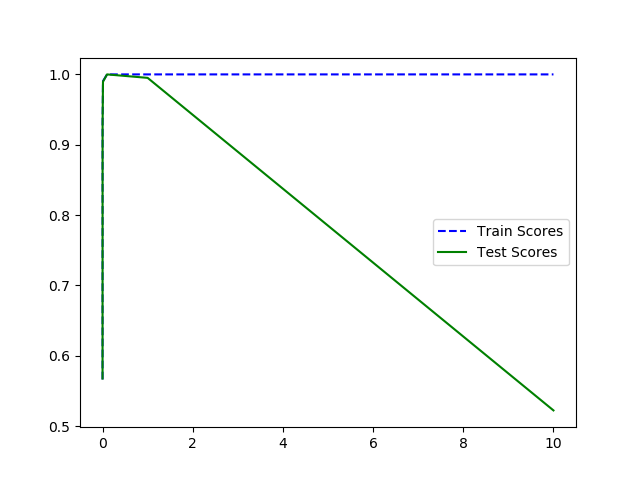

In [30]:
train_scores, test_scores = SVC()
gamma = np.logspace(-4, 1, 6)
plt.figure()
plt.plot(gamma, train_scores,'b--',label= 'Train Scores')
plt.plot(gamma, test_scores,'g-',label= 'Test Scores')
plt.legend()